In [58]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [59]:
# load the training dataset
train_p2 = pd.read_csv('/content/CE802_P2_Data.csv')

In [60]:
# Check for missing values
train_p2.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20      500
Class      0
dtype: int64

In [61]:
# Drop the Null value
train_p2.dropna(axis=1, inplace=True)

In [62]:
train_p2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   int64  
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   int64  
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  Class   1000 non-null   bool   
dtypes: bool(1), float64(17), int64(2)
memory usage: 149.5 KB


In [63]:
# Split the train and test data
train_feature= train_p2.drop('Class', axis=1)
train_outcome = train_p2['Class']
X_train, X_test, y_train, y_test = train_test_split(train_feature, train_outcome, test_size=0.2, random_state=42)

In [64]:
# Create a correlation matrix
train_corr = train_feature.corr()
train_corr

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
F1,1.000000,0.043121,-0.070234,-0.032705,-0.015329,0.050582,-0.059413,0.068430,0.034931,-0.006690,-0.026298,0.011520,0.037785,0.026723,-0.075142,-0.014457,0.000293,0.007035,0.035314
F2,0.043121,1.000000,-0.040642,-0.039438,0.003312,0.037528,-0.003992,-0.042789,-0.004537,-0.003282,0.005135,-0.000217,-0.057095,-0.014168,0.026755,0.013230,0.004320,-0.228368,0.014276
F3,-0.070234,-0.040642,1.000000,0.020058,0.003345,0.060880,0.052302,0.022825,-0.011350,-0.047216,0.064833,-0.027001,-0.085860,-0.020582,0.011213,0.016127,0.042076,0.026561,-0.012625
F4,-0.032705,-0.039438,0.020058,1.000000,0.029807,0.002052,0.014594,0.045470,-0.037730,-0.049583,0.036955,-0.002111,-0.017144,0.019288,0.008111,0.014355,0.020761,-0.033486,0.049179
F5,-0.015329,0.003312,0.003345,0.029807,1.000000,0.014832,0.009438,-0.011183,0.018811,0.287894,0.023085,-0.001481,-0.021865,-0.092579,0.040049,0.043066,-0.008624,0.014486,0.018222
F6,0.050582,0.037528,0.060880,0.002052,0.014832,1.000000,0.031391,0.041041,0.044801,-0.296979,-0.000216,0.063753,-0.021028,0.021133,-0.018169,-0.036978,0.254483,-0.040083,0.020361
F7,-0.059413,-0.003992,0.052302,0.014594,0.009438,0.031391,1.000000,0.005760,0.000484,-0.122382,0.028827,-0.236772,0.003971,0.006606,-0.007325,-0.011496,0.010592,0.006837,-0.003868
F8,0.068430,-0.042789,0.022825,0.045470,-0.011183,0.041041,0.005760,1.000000,0.213338,-0.042462,-0.048212,0.027008,0.052393,0.037891,0.009086,-0.000995,-0.000167,-0.055473,0.042713
F9,0.034931,-0.004537,-0.011350,-0.037730,0.018811,0.044801,0.000484,0.213338,1.000000,0.123040,-0.007732,0.033943,0.050463,0.012279,0.004519,-0.018403,0.238497,0.022679,-0.012361
F10,-0.006690,-0.003282,-0.047216,-0.049583,0.287894,-0.296979,-0.122382,-0.042462,0.123040,1.000000,0.004553,-0.006406,-0.006131,-0.016463,0.043781,-0.019447,-0.029493,-0.042754,-0.001953


<Axes: >

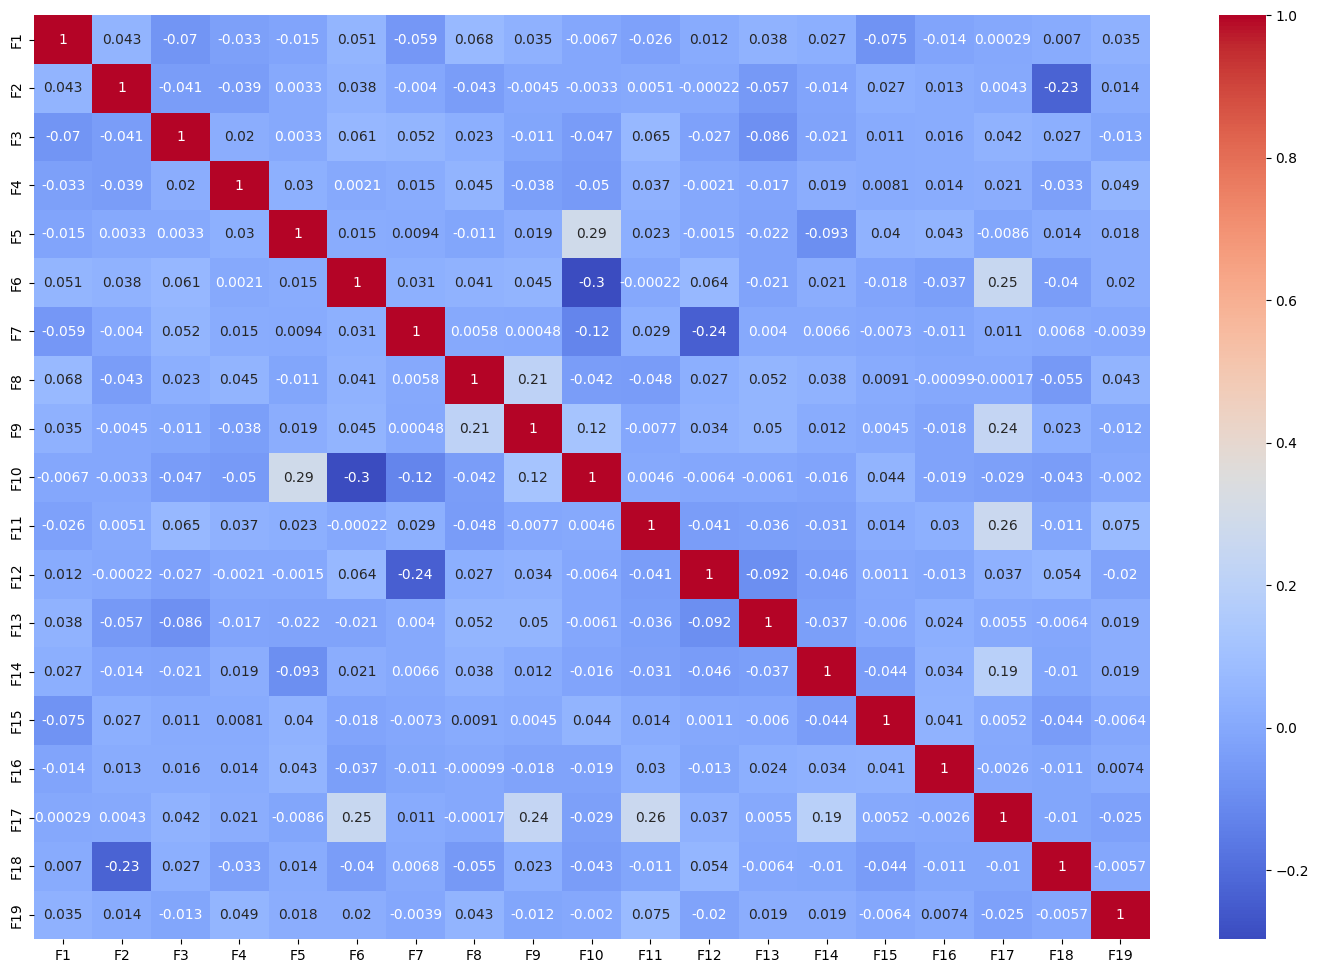

In [65]:
# Plotting the correlation matrix
plt.figure(figsize=(18,12))
sns.heatmap(train_corr, annot = True, cmap='coolwarm')

In [66]:
# Using imputer
imp = SimpleImputer(missing_values = np.nan ,strategy='mean')

X_train_imp = imp.fit_transform(X_train)
X_test_imp = imp.transform(X_test)

In [67]:
# Using Decision Tree classifier
tc = DecisionTreeClassifier()
tc.fit(X_train_imp, y_train)
t_pred = tc.predict(X_test_imp)
t_acc = accuracy_score(y_test, t_pred)
print("Decision Tree accuracy:", t_acc)

# Using Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train_imp, y_train)
rf_pred = rf.predict(X_test_imp)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest accuracy:", rf_acc)

Decision Tree accuracy: 0.83
Random Forest accuracy: 0.825


In [68]:
# Initiate the parameter grid
p_grid = {
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

In [69]:
# Using Gradient Boosting Machine classifier with GridSearchCV
gbm_class = GradientBoostingClassifier()
grid_gbm = GridSearchCV(gbm_class, param_grid=p_grid, cv=5)
grid_gbm.fit(X_train_imp, y_train)

# Print the best hyperparameters and best score
print("hyperparameters:", grid_gbm.best_params_)
print("GBM Accuracy score:", grid_gbm.best_score_)

# Predict the model
pred_gbm = grid_gbm.predict(X_test_imp)
gbm_acc = accuracy_score(y_test, pred_gbm)
print("Gradient Boosting Machine using grid:", gbm_acc)

hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
GBM Accuracy score: 0.9075
Gradient Boosting Machine using grid: 0.895


In [71]:

# Make a list of models and accuracy scores
ML = ['Gradient Boosting','Decision Tree','Random Forest']
acc = [gbm_acc, rf_acc, t_acc]

# Create a data frame with accuracy numbers and algorithms.
ma_df = pd.DataFrame({'ML_Models': ML, 'accuracy_values': acc})

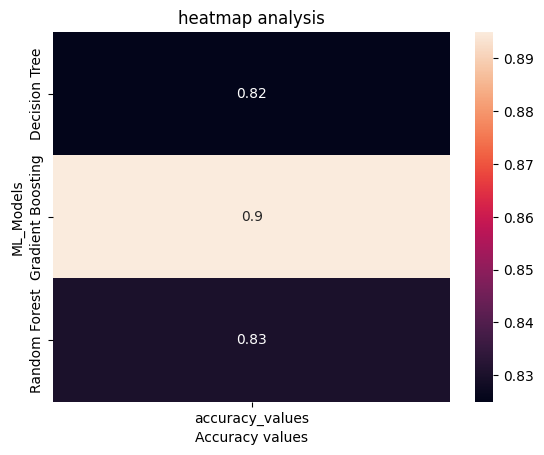

In [72]:

# Create a pivot table with accuracy numbers as columns and algorithms as rows.
pivot = ma_df.pivot_table(index='ML_Models', values='accuracy_values', aggfunc=np.median)

# Using heatmap
sns.heatmap(pivot, annot=True)

# Labels and titles
plt.xlabel('Accuracy values')
plt.title('heatmap analysis')

# show the plot
plt.show()

## TEST DATA PREDICTION

In [78]:
# Read the train data set
train2 = pd.read_csv('/content/CE802_P2_Data.csv')

In [79]:
# Read the test data set
test2 = pd.read_csv('/content/CE802_P2_Test.csv')

In [80]:
# Drop the null F20 column from train data set
train2.drop('F20', axis=1, inplace=True)

# Split the training data into features and labels, and then remove the Class column.
x_train = train2.drop('Class', axis=1)
y_train = train2['Class']

In [90]:
# Using imputer
imp2 = SimpleImputer(missing_values = np.nan ,strategy='mean')
X_train_imp2 = imp2.fit_transform(x_train)

# Drop the F20 column from test data set since it has null values
test2_F20 = test2['F20']
test2.drop('F20', axis=1, inplace=True)

# Drop the class value from test dataset and using scalar to transform the data
x_test = test2.drop('Class', axis=1)
x_test_imp2 = imp2.transform(x_test)

# On the entire training set, train a classifier using a gradient boosting machine.
gbm_c = GradientBoostingClassifier()
gbm_c.fit(X_train_imp2, y_train)

# Predict the test set's class designations.
ypred = gbm_c.predict(x_test_imp2)

#Add the F20 column again to the generate output file
test2.insert(19, 'F20', test2_F20)

#In the test data, replace projected labels with missing Class values.
test2['Class'] = ypred

# Generate the out csv file
test2.to_csv('/content/CE802_P2_Test.csv')

In [91]:
# Using imputer
imp2 = SimpleImputer(missing_values = np.nan ,strategy='mean')
X_train_imp2 = imp2.fit_transform(x_train)

In [52]:
print('output file generated. ')

output file generated. 
